In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('test.csv')

In [3]:
dataset = dataset.loc[dataset['same_source_target'] != 1]

In [23]:
n = 3

# top 3 mean cs
ds = dataset.groupby(
    ['source_uri', 'source_id', 'target_id'], sort=False
).filter(
    lambda x: len(x) >= n
    # keep predictions >= 3
).sort_values(
    ['source_uri', 'source_id', 'target_id', 'cosine_sim'], ascending=False
).groupby(
    ['source_uri', 'source_id', 'target_id'], sort=False
).head(n)[
    ['source_uri', 'source_id', 'target_id', 'cosine_sim']
    # retain possible predictions and its top 3 cos_sim
].groupby(
    ['source_uri', 'source_id', 'target_id'], sort=False, as_index=False
).agg(
    {"cosine_sim": np.mean}
    # average up possible predictions top 3 cos_sim
).sort_values(
    ['source_uri', 'cosine_sim'], ascending=False
).groupby(
    ['source_uri', 'source_id'], sort=False
).head(1)[
    ['source_uri', 'source_id', 'target_id', 'cosine_sim']
    # take the highest avg top 3 as final prediction
]

# label
pos_label = (ds['source_id'] == ds['target_id'])
neg_label = (ds['source_id'] != ds['target_id'])
ds.loc[pos_label, 'label'] = 1
ds.loc[neg_label, 'label'] = 0

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

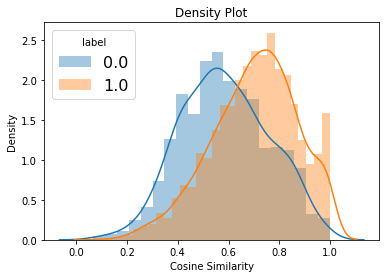

In [24]:
label = [0.0, 1.0]

for i in label:
    subset = ds[ds['label'] == i]
    sns.distplot(
        subset['cosine_sim'], 
        hist = True, 
        norm_hist=True,
        kde = True, 
        label = i
    )
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'label')
plt.title('Density Plot')

plt.xlabel('Cosine Similarity')
plt.ylabel('Density')

In [25]:
ds['cosine_sim'].quantile([0.9])

0.9    0.895388
Name: cosine_sim, dtype: float64

In [26]:
# predicted: cosine_sim threshold
threshold = 0.895388
pos_predicted = (ds['cosine_sim'] >= threshold)
neg_predicted = (ds['cosine_sim'] < threshold)
ds.loc[pos_predicted, 'predicted'] = 1
ds.loc[neg_predicted,'predicted'] = 0

ds[['label', 'predicted', 'source_uri']].groupby(['label', 'predicted']).count()

source_uri
label predicted            
0.0   0.0              1153
      1.0                43
1.0   0.0              2790
      1.0               396

In [27]:
# predicted: cosine_sim threshold
threshold = 0.6
pos_predicted = (ds['cosine_sim'] >= threshold)
neg_predicted = (ds['cosine_sim'] < threshold)
ds.loc[pos_predicted, 'predicted'] = 1
ds.loc[neg_predicted,'predicted'] = 0

ds[['label', 'predicted', 'source_uri']].groupby(['label', 'predicted']).count()

source_uri
label predicted            
0.0   0.0               658
      1.0               538
1.0   0.0               841
      1.0              2345